Author: Arko Saha </br>
Topic: Coursework 1 </br>
Module No.: CMP020L015A </br>
Module name: Machine Learning </br>
Module Tutor: Dr. Yuanlin Gu </br> 

------------------------------------------------------------------------------

This notebook will deal with a supervised learning problem based on this [research paper](https://www.sciencedirect.com/science/article/pii/S0925231221014296). The initial goals of this coursework are the following:

* Import the data
* Split the data into training and testing set 
* Build a model for prediction
* Evaluate the model

At first, let's start with importing the relevant python packages. 



In [70]:
# import the packages

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression, PoissonRegressor, ARDRegression, BayesianRidge
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor 
from sklearn import metrics

Now, let's import the dataset that we were given to perform this operation and create a dataframe for further data processing and analysis. For this purpose, we will be using "pandas" library.  

In [71]:
# importing the given dataset

df = pd.read_csv('cw1data.csv') 

# display the first 10 entries in the dataframe

df.head(10)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,49.83,1.68,82.8,24,6.554,6.538,6.438,6.390,6.318,29.44,39.83,59.10,54.11,40.72
1,50.12,1.71,86.5,53,6.593,6.578,6.465,6.420,6.356,19.11,40.19,57.34,53.60,39.24
2,49.02,1.65,91.0,45,6.488,6.466,6.360,6.313,6.251,31.00,41.56,56.69,50.99,38.08
3,61.70,1.69,100.7,42,6.361,6.334,6.209,6.160,6.087,33.39,44.33,52.26,45.33,29.23
4,40.83,1.72,62.3,37,6.667,6.644,6.539,6.491,6.417,34.33,48.35,69.03,62.02,44.97
5,46.17,1.68,79.8,22,6.477,6.456,6.349,6.296,6.222,30.67,42.28,59.10,51.95,38.74
6,45.85,1.56,73.0,40,6.410,6.378,6.238,6.179,6.100,39.30,51.51,63.78,53.84,33.51
7,46.01,1.51,89.0,52,6.237,6.219,6.110,6.056,5.978,21.44,29.83,47.35,44.63,31.76
8,55.63,1.58,91.3,38,6.269,6.231,6.095,6.038,5.958,30.45,42.67,53.70,45.36,31.12
9,50.67,1.65,83.1,23,6.344,6.323,6.194,6.141,6.054,9.93,25.31,54.10,47.69,32.76


For better understanding of the dataset, let's generate descriptive statistics for this dataset, which will include count, mean, std, min, max as well as 25th, 50th, and 75th percentiles. In this case, 25th will act as the lower percentile, 75th will be the higher percentile, and 50th will act as the median.  

In [72]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,55.147333,1.621556,97.740000,44.859259,6.308985,6.284193,6.176126,6.125274,6.051637,25.716370,35.791407,49.388667,44.078370,30.672593
std,8.184919,0.064875,17.580812,13.231669,0.140394,0.140646,0.141849,0.141934,0.142768,5.216336,6.893616,8.379095,7.214192,5.766506
min,36.590000,1.450000,56.200000,18.000000,5.944000,5.922000,5.831000,5.790000,5.725000,9.930000,18.840000,29.810000,26.140000,17.100000
25%,49.640000,1.580000,86.500000,36.500000,6.215500,6.190000,6.087000,6.038000,5.963000,22.100000,30.805000,43.950000,38.955000,26.420000
50%,55.150000,1.630000,96.100000,46.000000,6.302000,6.276000,6.166000,6.118000,6.042000,25.810000,35.850000,50.170000,44.560000,30.600000
75%,61.845000,1.660000,111.350000,55.000000,6.405500,6.382000,6.260500,6.211500,6.141000,29.430000,40.865000,54.920000,48.910000,34.270000
max,74.950000,1.800000,136.800000,69.000000,6.684000,6.654000,6.539000,6.491000,6.417000,41.920000,59.690000,74.410000,62.020000,44.970000


In [73]:
# checking the shape and variable types in dataset 

print(df.shape)
print(df.dtypes)

(135, 14)
y      float64
x1     float64
x2     float64
x3       int64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
dtype: object


Since the given dataset is preprocessed and clean, let's define the input variables (x) and output variables (y).  

In [74]:
# defining input variables as x and output variable as y

x = df.drop(['y'], axis = 1)
y = df['y']

# Visualizing data

Let's develop some codes to visualize the data now. First of all, we will see the correlation between the data dimension for which we will use the "Seaborn" library.   

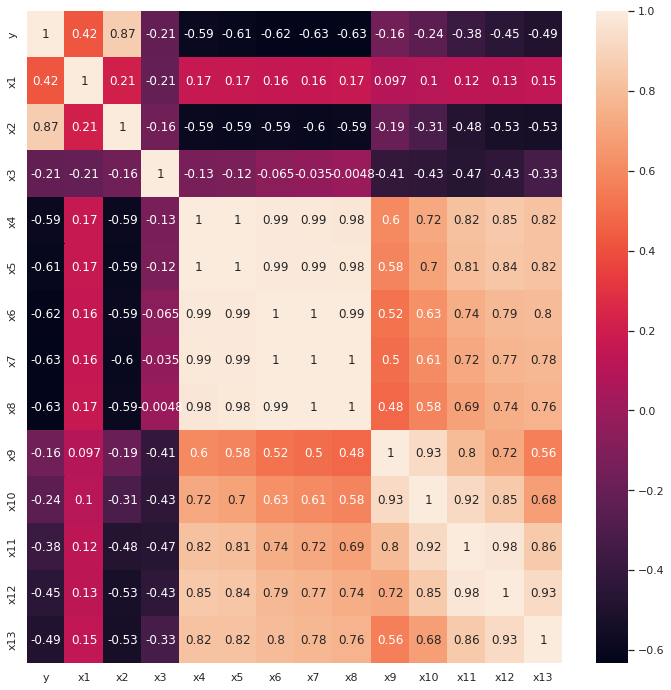

In [75]:
# Correlation between the data Dimensions

import seaborn as sns

corrMatrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True,)

Then we will visualize y, which is the output variable for this problem. We will consider histogram for assessing its probability distribution and its graphical representation. For this purpose, we will use "Matplotlib" library. 

Text(0.5, 0.98, 'Visualizing Output Variable')

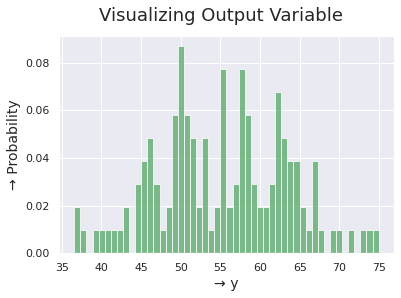

In [76]:
# visualizing y

n, bins, patches = plt.hist(y, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('→ y', fontsize=14)
plt.ylabel('→ Probability', fontsize=14)
plt.suptitle('Visualizing Output Variable', fontsize=18)

Now, let's visualize x, which will be the input variable for this problem. We will consider line plot for this purpose, where we will be using "Matplotlib" library once again. 

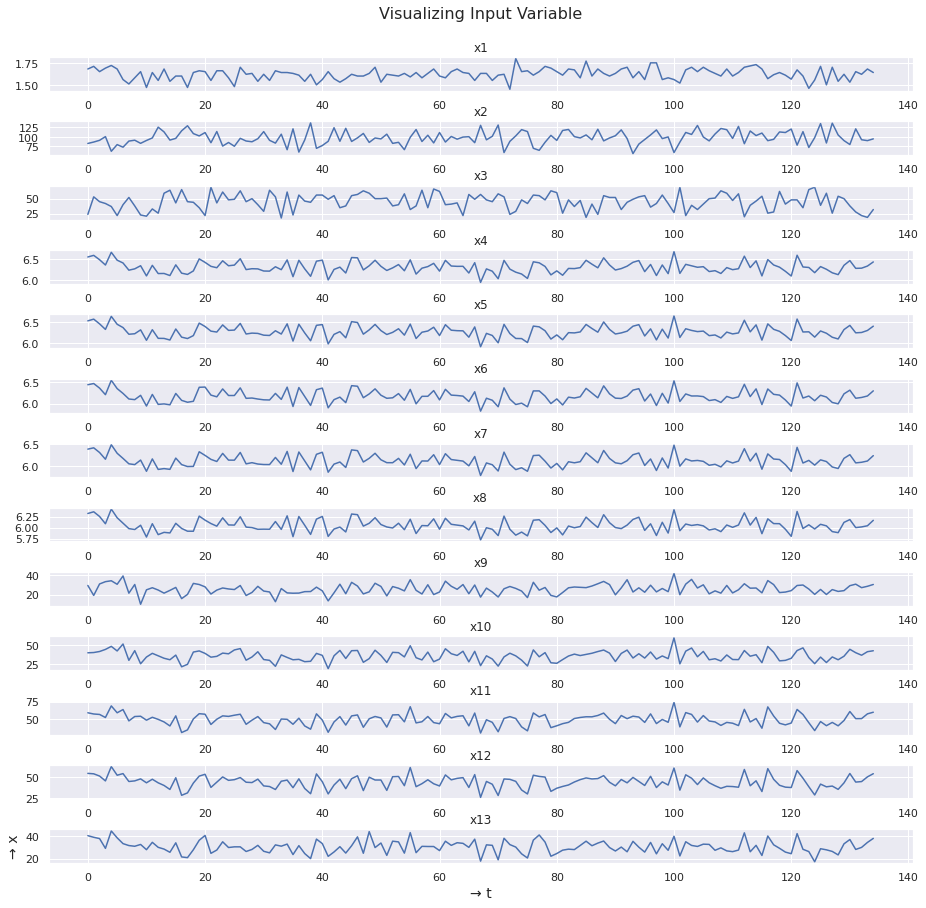

In [77]:
# visualizing x

# x.plot.hist(alpha=0.5, bins=10, figsize = (6,6))

fig = plt.figure(figsize=(15,14))
fig.suptitle('Visualizing Input Variable', y=0.95, fontsize=16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.9)

plt.subplot(13, 1, 1)
plt.gca().set_title('x1', y=1)
plt.plot(x.iloc[:, 0])

plt.subplot(13, 1, 2)
plt.gca().set_title('x2', y = 1)
plt.plot(x.iloc[:, 1])

plt.subplot(13, 1, 3)
plt.gca().set_title('x3')
plt.plot(x.iloc[:, 2])

plt.subplot(13, 1, 4)
plt.gca().set_title('x4')
plt.plot(x.iloc[:, 3])

plt.subplot(13, 1, 5)
plt.gca().set_title('x5')
plt.plot(x.iloc[:, 4])

plt.subplot(13, 1, 6)
plt.gca().set_title('x6')
plt.plot(x.iloc[:, 5])

plt.subplot(13, 1, 7)
plt.gca().set_title('x7')
plt.plot(x.iloc[:, 6])

plt.subplot(13, 1, 8)
plt.gca().set_title('x8')
plt.plot(x.iloc[:, 7])

plt.subplot(13, 1, 9)
plt.gca().set_title('x9')
plt.plot(x.iloc[:, 8])

plt.subplot(13, 1, 10)
plt.gca().set_title('x10')
plt.plot(x.iloc[:, 9])

plt.subplot(13, 1, 11)
plt.gca().set_title('x11')
plt.plot(x.iloc[:, 10])

plt.subplot(13, 1, 12)
plt.gca().set_title('x12')
plt.plot(x.iloc[:, 11])

plt.subplot(13, 1, 13)
plt.gca().set_title('x13')
plt.plot(x.iloc[:, 12])


plt.ylabel('→ x', fontsize=14)
plt.xlabel('→ t', fontsize=14)

plt.show()



# Spliting data into training and testing sets

The train-test split is a technique for evaluating the performance of a machine learning algorithm that can be used for classification and regression problems and can be used for any supervised learning algorithm. We will use "Scikit-learn" library for this operation. 

In [88]:
#  Spliting the data into training and testing set

from sklearn import preprocessing

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.20, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

X_scaled

array([[ 0.41654026, -0.40073768,  0.00346171, ...,  0.86653933,
         0.92061939,  1.22058497],
       [-0.05044605,  0.51346158,  0.45209954, ..., -1.27118495,
        -1.30632114, -1.34320139],
       [ 0.88352656, -0.23038999, -0.14608423, ...,  0.53792854,
         0.56057511,  0.58596768],
       ...,
       [ 0.10521605,  1.82513878,  0.90073737, ..., -2.27689769,
        -2.39312146, -2.22423923],
       [-0.1282771 , -0.25310302, -1.2676788 , ...,  0.60224738,
         0.41255691,  0.26865903],
       [-0.36177026,  0.62134845,  1.3493752 , ..., -1.30743739,
        -1.33699158, -1.02251712]])

Running these two lines splits the dataset into train and test sets. As we can see here, we are allocating 80% of the data to the training set and 20% of the data to the testing set. The random state hyperparameter in the train_test_split() function controls the shuffling process. With random_state=0 , we get the same train and test sets across different executions.

Now, we will proceed to several types of regression analysis. For this problem, we are choosing r2_score as a metric that computes the coefficient of determination in the model. 

# Build the model

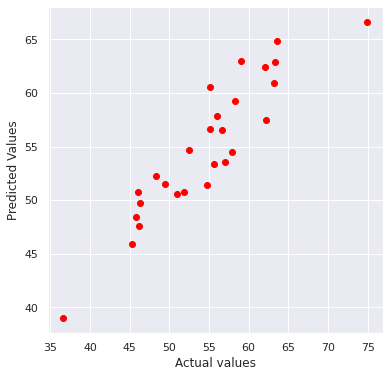

In [90]:
# lasso regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=1.0))

# lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , Y_train)
lasso_predict = lasso.predict(X_test)

# visualizing the regression analysis 

plt.figure(figsize=(6, 6))
plt.scatter(Y_test, lasso_predict, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

# results

r2_score_lasso = metrics.r2_score(Y_test, lasso_predict)

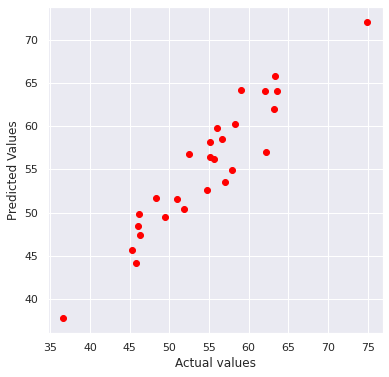

In [93]:
# linear regression

pipe = make_pipeline(StandardScaler(), LinearRegression())

reg = pipe.fit(x,y)
reg.score(x,y)
# reg.coef_
# reg.intercept_
lin_predict = reg.predict(X_test)

# visualizing the regression 

plt.figure(figsize=(6, 6))
plt.scatter(Y_test, lin_predict, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

# results

r2_score_lin = metrics.r2_score(Y_test,lin_predict)

In [94]:
# Poisson regression

glm = PoissonRegressor()
glm.fit(X_train, Y_train)

# results 

r2_score_poisson = glm.score(X_test, Y_test)

# Histogram-based Gradient Boosting Regression Tree

gbdt = HistGradientBoostingRegressor(loss="poisson", learning_rate=0.01)
gbdt.fit(X_train, Y_train)

# results 

r2_score_hist = gbdt.score(X_test, Y_test)

# Bayesian Ridge Regression 

brr = BayesianRidge(compute_score=True, n_iter=30).fit(X_train, Y_train)

# results 

r2_score_brr = brr.score(X_test, Y_test)

# ARD Regression 

ard = ARDRegression(compute_score=True, n_iter=30).fit(X_train, Y_train)

# results 

r2_score_ard = ard.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


# Evaluate the model

Finally, we will visualize the results from the above-performed regression analysis. 

In [82]:
# print("r2 score for Lasso Regression: ",r2_score_lasso)
# print("r2 score for Linear Regression:", r2_score_lin)
# print("r2 score for Poisson regression: ", r2_score_poisson)
# print("r2 score for Histogram-based Gradient Boosting Regression: ",r2_score_hist)
# print("r2 score for Bayesian Ridge Regression: ", r2_score_brr)
# print("r2 score for ARD Regression: ", r2_score_ard)

# results from different models

# creating a list containing all the r2 scores for different models

score = []
score.append(r2_score_lasso)
score.append(r2_score_lin)
score.append(r2_score_poisson)
score.append(r2_score_hist)
score.append(r2_score_brr)
score.append(r2_score_ard)

# labeling the model names

lbls = ["lasso", "linear", "poisson", "hist", "brr", "ard"]

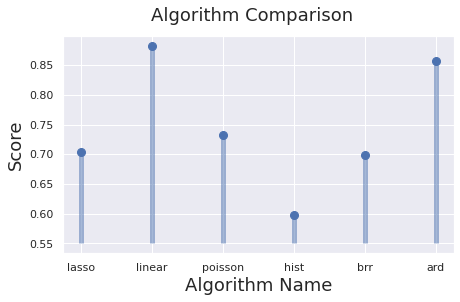

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(lbls, score, 'bo', ms=8, label='labels')
plt.ylabel("Score", fontsize="18")
plt.xlabel("Algorithm Name", fontsize="18")
plt.suptitle("Algorithm Comparison", fontsize="18")
ax.vlines(lbls, 0.55, score, colors='b', lw=5, alpha=0.5)

# Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Here, we will implement two different techniques to perform cross-validation and visualize them with confusion matrix.

0.534409435976219 0.132883002772138


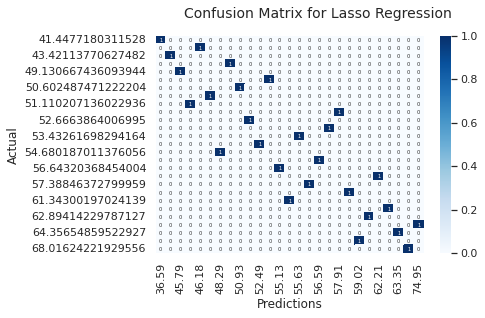

In [84]:
# Cross validation - lasso regression

# evaluate model
scores = cross_val_score(lasso, X_test, Y_test, cv=3)

# report performance
print(scores.mean(), scores.std())

# Confusion matrix

confusion_matrix = pd.crosstab(lasso_predict, Y_test, rownames=['Actual'], colnames=['Predictions'])
sns.set(font_scale=1)
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 5}, fmt="d", cmap="Blues")
plt.suptitle("Confusion Matrix for Lasso Regression", fontsize="14")
plt.show()

0.8209251578998268 0.10017253349514994


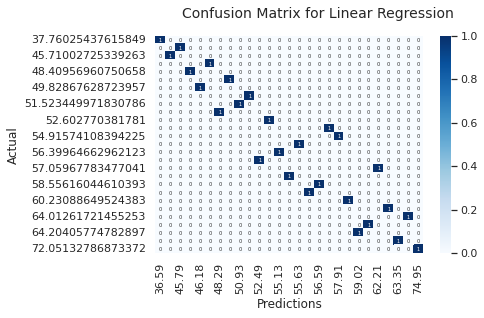

In [85]:
# Cross validation - Linear Regression

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(reg, x, y, cv=cv)

# report performance
print(scores.mean(), scores.std())

# Confusion Matrix 
confusion_matrix = pd.crosstab(lin_predict, Y_test, rownames=['Actual'], colnames=['Predictions'])
sns.set(font_scale=1)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, annot_kws={"size": 5}, cmap="Blues")
plt.suptitle("Confusion Matrix for Linear Regression", fontsize="14")
plt.show()

# Linear Regression wins this time!